In [11]:
# import
from arm import BernoulliArm
from random_select import Random_select
from e_greedy import Epsilon_greedy
from softmax import Softmax
from ucb import UCB
from thompson_sampling import Thompson_sampling
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [12]:
def mean_cumulative_reward(df_list):
    """累積報酬の平均を算出する
    
    :param df_list: DataFrameのリスト
    :return reward
    """
    return sum([df["reward"].sum() for df in df_list])/len(df_list)

In [13]:
def hit_rate(df_list):
    """各時刻の当たり率を時系列リストにして返す
    
    :param df_list: DataFrameのリスト
    :return hit_rate_list: list of hit rate (float, 0~1)
    """
    return list(sum([df["reward"] for df in df_list])/len(df_list))

In [14]:
def best_arm_rate(df_list,best_arm):
    """各時刻の最適アーム選択率を時系列リストにして返す
    
    :param df_list: DataFrameのリスト
    :param best_arm: (int) 最適なアームのインデックス(最適なアームとは報酬の期待値が最大のアーム)
    :return best_arm_rate_list: list of best arm rate (float, 0~1)
    """
    for df in df_list:
        df["is_best"]=df["arm"].apply(lambda x: 1 if x==best_arm  else 0)
    return list(sum([df["is_best"] for df in df_list])/len(df_list))

In [15]:
def simulate(alg,outer_iter):
    """Simulate algrithm.
    
    :param alg: algorithm for bandit problem
    :param outer_iter: the number of Monte Carlo method simulation
    :return hit_rate, best_arm_rate, cumulative_reward
    """
    df_list=[]
    for i in range(outer_iter):
            df=alg.execute()
            df_list.append(df)
    
    mu_list=[alg.arms[i].mu for i in range(alg.K)]
    best_arm=mu_list.index(max(mu_list))
    return hit_rate(df_list),best_arm_rate(df_list,best_arm),mean_cumulative_reward(df_list)

In [16]:
def plot_rate(rate_list,N,algos,title):
    """Plot each rate("Best Arm Rate" or "Hit Rate").
    
    :param rate_list: list of rate(float)
    :param N:the number of trials(int)
    :param algos: list of name of algorithm
    :param title: str.  Expect "Best Arm Rate" or "Hit Rate"
    """
    x = np.arange(N)
    plt.title(title)
    for i in range(len(rate_list)):
        plt.plot(x, rate_list[i], label=algos[i])
    plt.xlabel("trial")
    plt.ylabel("rate")
    plt.legend()
    plt.show()
    plt.close()
    return

In [17]:
def plot_cumulative_reward(rewards,algos):
    """Plot mean cumulative rewards of each algorithm.
    
    :param rewards: list of reward (int)
    :param algos: list of algorithm name (str)
    """
    x = np.array(range(len(rewards)))
    y= np.array(rewards)
    plt.bar(x,y,tick_label=algos, align="center")
    plt.show()
    plt.close()
    return

In [18]:
# set parameters
mus = [0.1,  0.1,  0.2,  0.2,  0.3, 0.3,  0.4,  0.4,  0.5,  0.6]
arms = [BernoulliArm(mu) for mu in mus]
N=10000
outer_iter=500

In [19]:
# create algorithm instance
e=0.1
temp=0.05
algos = [Random_select(arms,N),Epsilon_greedy(e,arms,N),Softmax(temp,arms,N),UCB(arms,N),Thompson_sampling(arms,N)]
algo_names=["Random","e-greedy","softmax","UCB","TS"]

Simulating <Random> N=10000 Arms=[BernoulliArm(0.1), BernoulliArm(0.1), BernoulliArm(0.2), BernoulliArm(0.2), BernoulliArm(0.3), BernoulliArm(0.3), BernoulliArm(0.4), BernoulliArm(0.4), BernoulliArm(0.5), BernoulliArm(0.6)]
Mean Cumulative Reward : 3098.962
Simulating <e-Greedy> N=10000 Arms=[BernoulliArm(0.1), BernoulliArm(0.1), BernoulliArm(0.2), BernoulliArm(0.2), BernoulliArm(0.3), BernoulliArm(0.3), BernoulliArm(0.4), BernoulliArm(0.4), BernoulliArm(0.5), BernoulliArm(0.6)] e=0.1
Mean Cumulative Reward : 5605.186
Simulating <Softmax> N=10000 Arms=[BernoulliArm(0.1), BernoulliArm(0.1), BernoulliArm(0.2), BernoulliArm(0.2), BernoulliArm(0.3), BernoulliArm(0.3), BernoulliArm(0.4), BernoulliArm(0.4), BernoulliArm(0.5), BernoulliArm(0.6)] temp=0.05
Mean Cumulative Reward : 5541.06
Simulating <UCB> N=10000 Arms=[BernoulliArm(0.1), BernoulliArm(0.1), BernoulliArm(0.2), BernoulliArm(0.2), BernoulliArm(0.3), BernoulliArm(0.3), BernoulliArm(0.4), BernoulliArm(0.4), BernoulliArm(0.5), Bernou

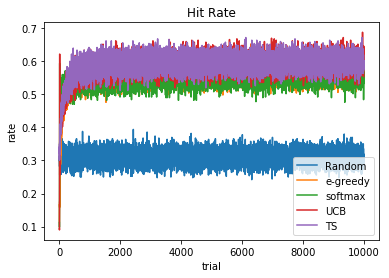

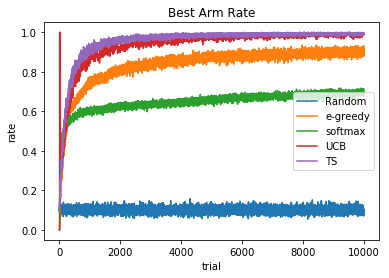

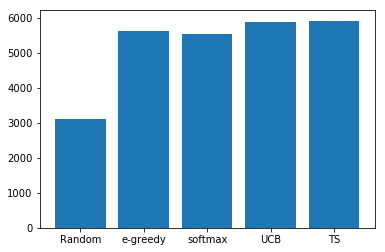

In [20]:
# execute(アルゴリズム別)
hit_rate_list=[]
best_rate_list=[]
reward_list=[]
for alg in algos:
    print("Simulating {}".format(alg))
    hit,best,reward=simulate(alg,outer_iter)
    print("Mean Cumulative Reward : {}".format(reward))
    hit_rate_list.append(hit)
    best_rate_list.append(best)
    reward_list.append(reward)

# visualize
plot_rate(hit_rate_list,N,algo_names,"Hit Rate")
plot_rate(best_rate_list,N,algo_names,"Best Arm Rate")
plot_cumulative_reward(reward_list,algo_names)

Simulating <e-Greedy> N=10000 Arms=[BernoulliArm(0.1), BernoulliArm(0.1), BernoulliArm(0.2), BernoulliArm(0.2), BernoulliArm(0.3), BernoulliArm(0.3), BernoulliArm(0.4), BernoulliArm(0.4), BernoulliArm(0.5), BernoulliArm(0.6)] e=0.1
Mean Cumulative Reward : 5614.096
Simulating <e-Greedy> N=10000 Arms=[BernoulliArm(0.1), BernoulliArm(0.1), BernoulliArm(0.2), BernoulliArm(0.2), BernoulliArm(0.3), BernoulliArm(0.3), BernoulliArm(0.4), BernoulliArm(0.4), BernoulliArm(0.5), BernoulliArm(0.6)] e=0.2
Mean Cumulative Reward : 5371.11
Simulating <e-Greedy> N=10000 Arms=[BernoulliArm(0.1), BernoulliArm(0.1), BernoulliArm(0.2), BernoulliArm(0.2), BernoulliArm(0.3), BernoulliArm(0.3), BernoulliArm(0.4), BernoulliArm(0.4), BernoulliArm(0.5), BernoulliArm(0.6)] e=0.3
Mean Cumulative Reward : 5099.842
Simulating <e-Greedy> N=10000 Arms=[BernoulliArm(0.1), BernoulliArm(0.1), BernoulliArm(0.2), BernoulliArm(0.2), BernoulliArm(0.3), BernoulliArm(0.3), BernoulliArm(0.4), BernoulliArm(0.4), BernoulliArm(0.

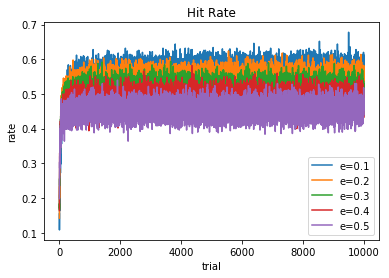

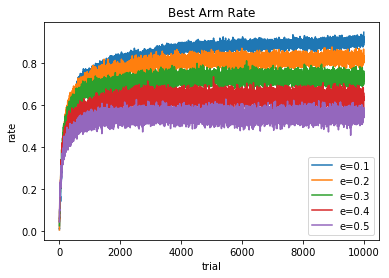

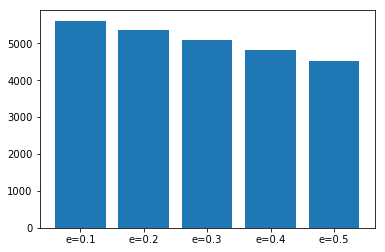

In [9]:
# hyper parameter tuning (epsilon)
e_list=[0.1,0.2,0.3,0.4,0.5]
algos = [Epsilon_greedy(e,arms,N) for e in e_list]
algo_names=["e={}".format(e) for e in e_list]

hit_rate_list=[]
best_rate_list=[]
reward_list=[]
for alg in algos:
    print("Simulating {}".format(alg))
    hit,best,reward=simulate(alg,outer_iter)
    print("Mean Cumulative Reward : {}".format(reward))
    hit_rate_list.append(hit)
    best_rate_list.append(best)
    reward_list.append(reward)

# visualize
plot_rate(hit_rate_list,N,algo_names,"Hit Rate")
plot_rate(best_rate_list,N,algo_names,"Best Arm Rate")
plot_cumulative_reward(reward_list,algo_names)

Simulating <Softmax> N=10000 Arms=[BernoulliArm(0.1), BernoulliArm(0.1), BernoulliArm(0.2), BernoulliArm(0.2), BernoulliArm(0.3), BernoulliArm(0.3), BernoulliArm(0.4), BernoulliArm(0.4), BernoulliArm(0.5), BernoulliArm(0.6)] temp=0.01
Mean Cumulative Reward : 5247.174
Simulating <Softmax> N=10000 Arms=[BernoulliArm(0.1), BernoulliArm(0.1), BernoulliArm(0.2), BernoulliArm(0.2), BernoulliArm(0.3), BernoulliArm(0.3), BernoulliArm(0.4), BernoulliArm(0.4), BernoulliArm(0.5), BernoulliArm(0.6)] temp=0.05
Mean Cumulative Reward : 5539.276
Simulating <Softmax> N=10000 Arms=[BernoulliArm(0.1), BernoulliArm(0.1), BernoulliArm(0.2), BernoulliArm(0.2), BernoulliArm(0.3), BernoulliArm(0.3), BernoulliArm(0.4), BernoulliArm(0.4), BernoulliArm(0.5), BernoulliArm(0.6)] temp=0.1
Mean Cumulative Reward : 5242.932
Simulating <Softmax> N=10000 Arms=[BernoulliArm(0.1), BernoulliArm(0.1), BernoulliArm(0.2), BernoulliArm(0.2), BernoulliArm(0.3), BernoulliArm(0.3), BernoulliArm(0.4), BernoulliArm(0.4), Bernoul

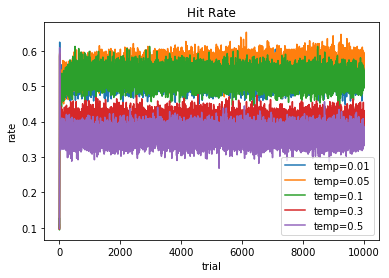

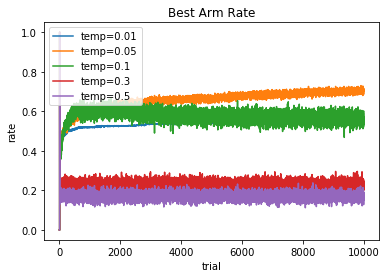

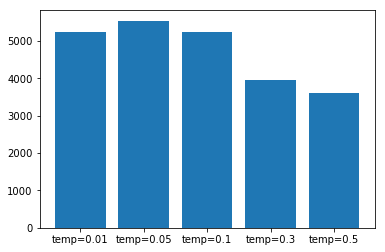

In [10]:
# hyper parameter tuning (temperature)
temp_list=[0.01,0.05,0.1,0.3,0.5]
algos = [Softmax(temp,arms,N) for temp in temp_list]
algo_names=["temp={}".format(temp) for temp in temp_list]

hit_rate_list=[]
best_rate_list=[]
reward_list=[]
for alg in algos:
    print("Simulating {}".format(alg))
    hit,best,reward=simulate(alg,outer_iter)
    print("Mean Cumulative Reward : {}".format(reward))
    hit_rate_list.append(hit)
    best_rate_list.append(best)
    reward_list.append(reward)

# visualize
plot_rate(hit_rate_list,N,algo_names,"Hit Rate")
plot_rate(best_rate_list,N,algo_names,"Best Arm Rate")
plot_cumulative_reward(reward_list,algo_names)